### Experimentation with pyspark while watching Andrew Ray's Data Wrangling with PySpark for Data Scientists Who Know Pandas

In [1]:
import os
from pyspark.sql.types import IntegerType, DoubleType
# using F functions means that your processing stays in the JVM so it's fast
import pyspark.sql.functions as F
import pandas as pd
import matplotlib

%matplotlib inline

In [2]:
# default matplotlib figure size 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# pandas dataframe floating point format
pd.set_option('display.precision', 5)

# pandas dataframe max number of rows to display
pd.set_option('max_rows', 100)

In [3]:
TESTFILE = os.path.join(os.environ['HOME'],
                        'anaconda3/lib/python3.6/site-packages/statsmodels/datasets/statecrime/statecrime.csv')

In [4]:
df = (spark.read.options(header=True, inferSchema=True).csv(TESTFILE))
df.show()

+--------------------+-------+------+-------+-------+------+-----+-----+
|               state|violent|murder|hs_grad|poverty|single|white|urban|
+--------------------+-------+------+-------+-------+------+-----+-----+
|             Alabama|  459.9|   7.1|   82.1|   17.5|  29.0| 70.0|48.65|
|              Alaska|  632.6|   3.2|   91.4|    9.0|  25.5| 68.3|44.46|
|             Arizona|  423.2|   5.5|   84.2|   16.5|  25.7| 80.0|80.07|
|            Arkansas|  530.3|   6.3|   82.4|   18.8|  26.3| 78.4|39.54|
|          California|  473.4|   5.4|   80.6|   14.2|  27.8| 62.7|89.73|
|            Colorado|  340.9|   3.2|   89.3|   12.9|  21.4| 84.6|76.86|
|         Connecticut|  300.5|   3.0|   88.6|    9.4|  25.0| 79.1|84.83|
|            Delaware|  645.1|   4.6|   87.4|   10.8|  27.6| 71.9|68.71|
|District of Columbia| 1348.9|  24.2|   87.1|   18.4|  48.0| 38.7|100.0|
|             Florida|  612.6|   5.5|   85.3|   14.9|  26.6| 76.9|87.44|
|             Georgia|  432.6|   6.0|   83.9|   16.

In [5]:
df.describe().toPandas()

,summary,state,violent,murder,hs_grad,poverty,single,white,urban
0,count,51,51,51,51,51,51,51,51
1,mean,None,411.48235294117643,4.9,86.87843137254906,13.854901960784314,25.186274509803923,77.9686274509804,60.67019607843137
2,stddev,None,208.0174470623869,3.6460938002196275,3.3777693068349235,3.11058282162621,4.786565349301861,13.55302903702458,20.802432404908426
3,min,Alabama,119.9,0.9,79.9,8.5,17.9,26.9,17.38
4,max,Wyoming,1348.9,24.2,91.8,21.9,48.0,95.8,100.0


In [6]:
# quartiles
df.selectExpr('percentile_approx(hs_grad, array(.25, .5, .75)) as hsgrad_quart').show()

+------------------+
|      hsgrad_quart|
+------------------+
|[83.9, 87.4, 89.8]|
+------------------+



In [7]:
df.withColumnRenamed('hs_grad', 'foo').show(5)

+----------+-------+------+----+-------+------+-----+-----+
|     state|violent|murder| foo|poverty|single|white|urban|
+----------+-------+------+----+-------+------+-----+-----+
|   Alabama|  459.9|   7.1|82.1|   17.5|  29.0| 70.0|48.65|
|    Alaska|  632.6|   3.2|91.4|    9.0|  25.5| 68.3|44.46|
|   Arizona|  423.2|   5.5|84.2|   16.5|  25.7| 80.0|80.07|
|  Arkansas|  530.3|   6.3|82.4|   18.8|  26.3| 78.4|39.54|
|California|  473.4|   5.4|80.6|   14.2|  27.8| 62.7|89.73|
+----------+-------+------+----+-------+------+-----+-----+
only showing top 5 rows



In [8]:
# no axis option like pandas
df.drop('hs_grad').show(5)

+----------+-------+------+-------+------+-----+-----+
|     state|violent|murder|poverty|single|white|urban|
+----------+-------+------+-------+------+-----+-----+
|   Alabama|  459.9|   7.1|   17.5|  29.0| 70.0|48.65|
|    Alaska|  632.6|   3.2|    9.0|  25.5| 68.3|44.46|
|   Arizona|  423.2|   5.5|   16.5|  25.7| 80.0|80.07|
|  Arkansas|  530.3|   6.3|   18.8|  26.3| 78.4|39.54|
|California|  473.4|   5.4|   14.2|  27.8| 62.7|89.73|
+----------+-------+------+-------+------+-----+-----+
only showing top 5 rows



In [9]:
# filtering
df[df.murder > 10].show()

+--------------------+-------+------+-------+-------+------+-----+-----+
|               state|violent|murder|hs_grad|poverty|single|white|urban|
+--------------------+-------+------+-------+-------+------+-----+-----+
|District of Columbia| 1348.9|  24.2|   87.1|   18.4|  48.0| 38.7|100.0|
|           Louisiana|  628.4|  12.3|   82.2|   17.3|  31.4| 63.7|61.33|
+--------------------+-------+------+-------+-------+------+-----+-----+



In [10]:
# complex filtering 
df[(df.violent < 500) & (df.urban > 75)].sort('urban').show(5)

+--------+-------+------+-------+-------+------+-----+-----+
|   state|violent|murder|hs_grad|poverty|single|white|urban|
+--------+-------+------+-------+-------+------+-----+-----+
|   Texas|  491.4|   5.4|   79.9|   17.2|  27.6| 73.8|75.35|
|Colorado|  340.9|   3.2|   89.3|   12.9|  21.4| 84.6|76.86|
| Arizona|  423.2|   5.5|   84.2|   16.5|  25.7| 80.0|80.07|
|    Utah|  216.2|   1.4|   90.4|   11.5|  17.9| 89.3|81.17|
|New York|  385.5|   4.0|   84.7|   14.2|  30.2| 67.4|82.66|
+--------+-------+------+-------+-------+------+-----+-----+
only showing top 5 rows



In [11]:
# add column and change its data type
# Note that divide-by-zero gives NULL, not Inf like pandas -
# but you can call .fillna() although with fewer options than pandas
df2 = df.withColumn('dummy1', 10 / df.murder)
df2 = (df2.withColumn('dummy', df2.dummy1.cast(IntegerType()))
       .drop('dummy1'))
df2.show(5)

+----------+-------+------+-------+-------+------+-----+-----+-----+
|     state|violent|murder|hs_grad|poverty|single|white|urban|dummy|
+----------+-------+------+-------+-------+------+-----+-----+-----+
|   Alabama|  459.9|   7.1|   82.1|   17.5|  29.0| 70.0|48.65|    1|
|    Alaska|  632.6|   3.2|   91.4|    9.0|  25.5| 68.3|44.46|    3|
|   Arizona|  423.2|   5.5|   84.2|   16.5|  25.7| 80.0|80.07|    1|
|  Arkansas|  530.3|   6.3|   82.4|   18.8|  26.3| 78.4|39.54|    1|
|California|  473.4|   5.4|   80.6|   14.2|  27.8| 62.7|89.73|    1|
+----------+-------+------+-------+-------+------+-----+-----+-----+
only showing top 5 rows



In [12]:
df2.groupby('dummy').agg({'violent': 'mean', 'urban': 'mean'}).sort('dummy').toPandas()

,dummy,avg(violent),avg(urban)
0,0,988.65000,80.66500
1,1,516.06000,64.06000
2,2,348.85556,59.22111
3,3,359.47500,68.02125
4,4,283.35000,58.12500
5,5,209.22500,40.54500
6,6,226.35000,54.25500
7,7,215.26667,46.73667
8,11,169.50000,47.34000


In [13]:
# Create new column based on conditions: if - elif - else
# Stays within JVM
df.withColumn('cond',
              F.when(df.hs_grad > 90, 1)
               .when(df.hs_grad > 80, 2)
               .otherwise(3)).groupby('cond').count().show()

+----+-----+
|cond|count|
+----+-----+
|   1|   11|
|   3|    1|
|   2|   39|
+----+-----+



In [14]:
# Custom Python code (slower than staying in JVM); make sure udf return type is correct
fn = F.udf(lambda x: round(x / 10.0, 0) * 10.0, DoubleType())
df.withColumn('rounded_white', fn(df.white)).show(5)

+----------+-------+------+-------+-------+------+-----+-----+-------------+
|     state|violent|murder|hs_grad|poverty|single|white|urban|rounded_white|
+----------+-------+------+-------+-------+------+-----+-----+-------------+
|   Alabama|  459.9|   7.1|   82.1|   17.5|  29.0| 70.0|48.65|         70.0|
|    Alaska|  632.6|   3.2|   91.4|    9.0|  25.5| 68.3|44.46|         70.0|
|   Arizona|  423.2|   5.5|   84.2|   16.5|  25.7| 80.0|80.07|         80.0|
|  Arkansas|  530.3|   6.3|   82.4|   18.8|  26.3| 78.4|39.54|         80.0|
|California|  473.4|   5.4|   80.6|   14.2|  27.8| 62.7|89.73|         60.0|
+----------+-------+------+-------+-------+------+-----+-----+-------------+
only showing top 5 rows



In [15]:
df3 = df[['state', 'hs_grad']]
df3 = df3.withColumn('jointest',
                          F.when(df3.hs_grad > 85, 1)
                           .otherwise(0))
df3.show(5)

+----------+-------+--------+
|     state|hs_grad|jointest|
+----------+-------+--------+
|   Alabama|   82.1|       0|
|    Alaska|   91.4|       1|
|   Arizona|   84.2|       0|
|  Arkansas|   82.4|       0|
|California|   80.6|       0|
+----------+-------+--------+
only showing top 5 rows



In [16]:
df.join(df3, on='state').show(5)

+----------+-------+------+-------+-------+------+-----+-----+-------+--------+
|     state|violent|murder|hs_grad|poverty|single|white|urban|hs_grad|jointest|
+----------+-------+------+-------+-------+------+-----+-----+-------+--------+
|   Alabama|  459.9|   7.1|   82.1|   17.5|  29.0| 70.0|48.65|   82.1|       0|
|    Alaska|  632.6|   3.2|   91.4|    9.0|  25.5| 68.3|44.46|   91.4|       1|
|   Arizona|  423.2|   5.5|   84.2|   16.5|  25.7| 80.0|80.07|   84.2|       0|
|  Arkansas|  530.3|   6.3|   82.4|   18.8|  26.3| 78.4|39.54|   82.4|       0|
|California|  473.4|   5.4|   80.6|   14.2|  27.8| 62.7|89.73|   80.6|       0|
+----------+-------+------+-------+-------+------+-----+-----+-------+--------+
only showing top 5 rows



In [17]:
# specify each table's key
df.join(df3, df.state == df3.state).show(5)

+----------+-------+------+-------+-------+------+-----+-----+----------+-------+--------+
|     state|violent|murder|hs_grad|poverty|single|white|urban|     state|hs_grad|jointest|
+----------+-------+------+-------+-------+------+-----+-----+----------+-------+--------+
|   Alabama|  459.9|   7.1|   82.1|   17.5|  29.0| 70.0|48.65|   Alabama|   82.1|       0|
|    Alaska|  632.6|   3.2|   91.4|    9.0|  25.5| 68.3|44.46|    Alaska|   91.4|       1|
|   Arizona|  423.2|   5.5|   84.2|   16.5|  25.7| 80.0|80.07|   Arizona|   84.2|       0|
|  Arkansas|  530.3|   6.3|   82.4|   18.8|  26.3| 78.4|39.54|  Arkansas|   82.4|       0|
|California|  473.4|   5.4|   80.6|   14.2|  27.8| 62.7|89.73|California|   80.6|       0|
+----------+-------+------+-------+-------+------+-----+-----+----------+-------+--------+
only showing top 5 rows



In [18]:
vals = [[1, 3, 7, 100],
        [1, 5, 7, 110],
        [1, 5, 9, 120],
        [2, 5, 7, 130],
        [2, 5, 9, 140]]
cols = ['a', 'b', 'c', 'd']
df4 = sqlContext.createDataFrame(vals, cols)
df4.show()

+---+---+---+---+
|  a|  b|  c|  d|
+---+---+---+---+
|  1|  3|  7|100|
|  1|  5|  7|110|
|  1|  5|  9|120|
|  2|  5|  7|130|
|  2|  5|  9|140|
+---+---+---+---+



In [19]:
# for each unique (a,b) tuple:
#  - make columns from the unique values of 'c'
#  - cell value is the sum of the 'd's found
#        for that combination of (a,b,c)
df4.groupby('a', 'b').pivot('c').sum('d').show()

+---+---+---+----+
|  a|  b|  7|   9|
+---+---+---+----+
|  1|  3|100|null|
|  2|  5|130| 140|
|  1|  5|110| 120|
+---+---+---+----+



In [20]:
# put a 0 in the missing values
df4.groupby('a', 'b').pivot('c').sum('d').fillna(0).show()

+---+---+---+---+
|  a|  b|  7|  9|
+---+---+---+---+
|  1|  3|100|  0|
|  2|  5|130|140|
|  1|  5|110|120|
+---+---+---+---+



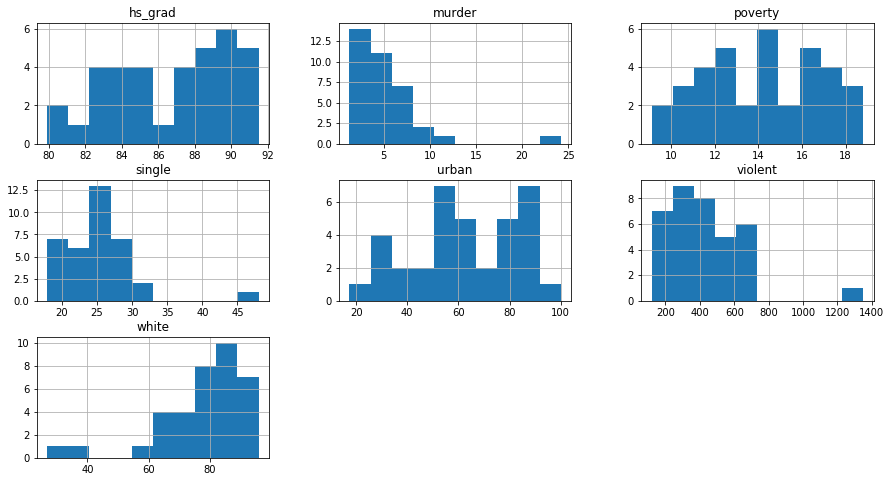

In [21]:
# do histogram in pandas, retrieving only a sampling (keep 75% in this case)
df.sample(False, 0.75).toPandas().hist();

In [22]:
# sql commands on dataframes
df.createOrReplaceTempView('fooview')
spark.sql('select * from fooview where hs_grad > 90').show()

+-------------+-------+------+-------+-------+------+-----+-----+
|        state|violent|murder|hs_grad|poverty|single|white|urban|
+-------------+-------+------+-------+-------+------+-----+-----+
|       Alaska|  632.6|   3.2|   91.4|    9.0|  25.5| 68.3|44.46|
|       Hawaii|  274.1|   1.8|   90.4|   10.4|  26.3| 26.9|71.46|
|         Iowa|  294.5|   1.3|   90.5|   11.8|  20.3| 92.3|41.66|
|        Maine|  119.9|   2.0|   90.2|   12.3|  22.0| 94.9|26.21|
|    Minnesota|  214.2|   1.5|   91.5|   11.0|  20.2| 87.4| 58.0|
|     Montana |  283.9|   3.2|   90.8|   15.1|  20.3| 89.4|26.49|
|New Hampshire|  169.5|   0.9|   91.3|    8.5|  19.5| 94.5|47.34|
| North Dakota|  223.6|   2.0|   90.1|   11.7|  18.2| 90.2| 40.0|
|         Utah|  216.2|   1.4|   90.4|   11.5|  17.9| 89.3|81.17|
|      Vermont|  135.1|   1.3|   91.0|   11.4|  21.3| 95.8|17.38|
|      Wyoming|  219.3|   2.0|   91.8|    9.8|  18.9| 91.3|24.51|
+-------------+-------+------+-------+-------+------+-----+-----+



In [23]:
# convert to Pandas - limit size before conversion
df.limit(10).toPandas()

,state,violent,murder,hs_grad,poverty,single,white,urban
0,Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
1,Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
2,Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
3,Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
4,California,473.4,5.4,80.6,14.2,27.8,62.7,89.73
5,Colorado,340.9,3.2,89.3,12.9,21.4,84.6,76.86
6,Connecticut,300.5,3.0,88.6,9.4,25.0,79.1,84.83
7,Delaware,645.1,4.6,87.4,10.8,27.6,71.9,68.71
8,District of Columbia,1348.9,24.2,87.1,18.4,48.0,38.7,100.00
9,Florida,612.6,5.5,85.3,14.9,26.6,76.9,87.44
